In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.style.use('ggplot')
%matplotlib inline

data = pd.read_csv('Parking_Violations_Issued_-_Fiscal_Year_2015.csv', parse_dates=['Issue Date'])

/usr/lib64/python2.7/site-packages/pandas/io/parsers.py:1159: DtypeWarning: Columns (18,29,38,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [2]:
data.columns

Index([u'Summons Number', u'Plate ID', u'Registration State', u'Plate Type', u'Issue Date', u'Violation Code', u'Vehicle Body Type', u'Vehicle Make', u'Issuing Agency', u'Street Code1', u'Street Code2', u'Street Code3', u'Vehicle Expiration Date', u'Violation Location', u'Violation Precinct', u'Issuer Precinct', u'Issuer Code', u'Issuer Command', u'Issuer Squad', u'Violation Time', u'Time First Observed', u'Violation County', u'Violation In Front Of Or Opposite', u'House Number', u'Street Name', u'Intersecting Street', u'Date First Observed', u'Law Section', u'Sub Division', u'Violation Legal Code', u'Days Parking In Effect    ', u'From Hours In Effect', u'To Hours In Effect', u'Vehicle Color', u'Unregistered Vehicle?', u'Vehicle Year', u'Meter Number', u'Feet From Curb', u'Violation Post Code', u'Violation Description', u'No Standing or Stopping Violation', u'Hydrant Violation', u'Double Parking Violation'], dtype='object')

In [3]:
data.head()

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,4606273501,80065,NY,MED,2015-04-14,36,4DSD,TOYOT,V,0,...,BK,NaN,2011,NaN,0,NaN,PHTO SCHOOL ZN SPEED VIOLATION,NaN,NaN,NaN
1,4605142071,DNV2329,NY,PAS,2015-02-10,36,SUBN,CHRYS,V,0,...,GY,NaN,2014,NaN,0,NaN,PHTO SCHOOL ZN SPEED VIOLATION,NaN,NaN,NaN
2,5083368754,FDZ1417,NY,PAS,2014-10-18,7,4DSD,CHRYS,V,0,...,GY,NaN,2013,NaN,0,NaN,FAILURE TO STOP AT RED LIGHT,NaN,NaN,NaN
3,4606233874,GTD9392,PA,PAS,2015-04-14,36,CP,INFIN,V,0,...,NaN,NaN,2011,NaN,0,NaN,PHTO SCHOOL ZN SPEED VIOLATION,NaN,NaN,NaN
4,4603033692,EVR1705,NY,PAS,2014-10-10,36,SUBN,LEXUS,V,0,...,GY,NaN,2007,NaN,0,NaN,PHTO SCHOOL ZN SPEED VIOLATION,NaN,NaN,NaN


# By states

In [4]:
# total
data.groupby('Registration State').size().order(ascending=False).head(10)

Registration State
NY                    9193289
NJ                    1080414
PA                     298877
CT                     160361
FL                     148868
MA                     101164
IN                      83192
VA                      81464
MD                      63416
NC                      58871
dtype: int64

In [5]:
# percentage
temp = data.groupby('Registration State').size().apply(lambda x: 100*x/float(data.shape[0])).order(ascending=False).head(10)
temp

Registration State
NY                    77.848316
NJ                     9.148892
PA                     2.530876
CT                     1.357929
FL                     1.260607
MA                     0.856652
IN                     0.704466
VA                     0.689833
MD                     0.537004
NC                     0.498517
dtype: float64

In [6]:
# numbers from http://www.rita.dot.gov/bts/sites/rita.dot.gov.bts/files/publications/state_transportation_statistics_85/index.html
byStates = {'NY':10400000/2536000, 'NJ':7900000/2536000, 'PA':10500000/2536000, 'CT':2700000/2536000, 'FL':15700000/2536000, 'MA':4900000/2536000, 'VA':7100000/2536000, 'MD':4000000/2536000, 'IN':6000000/2536000, 'NC':7800000/2536000}
states = ['NY', 'NJ', 'PA', 'CT', 'FL', 'MA', 'VA', 'MD', 'IN', 'NC']
for state in states:
    print('%s\t%f' % (state, byStates[state]))

NY	4.000000
NJ	3.000000
PA	4.000000
CT	1.000000
FL	6.000000
MA	1.000000
VA	2.000000
MD	1.000000
IN	2.000000
NC	3.000000


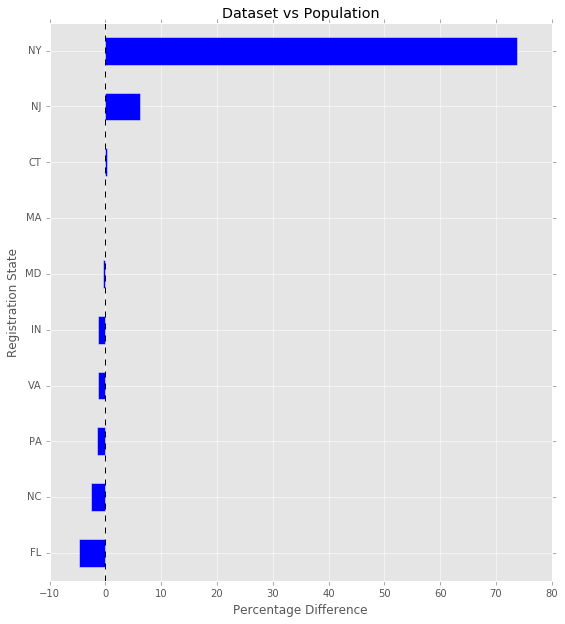

In [7]:
temp2 = pd.Series(byStates)
diff = temp - temp2
diff.order().plot(kind='barh', figsize=[9, 10])
plt.title('Dataset vs Population')
plt.ylabel('Registration State')
plt.xlabel('Percentage Difference')

# By colors

In [8]:
# some data cleaning
color = data.index[data['Vehicle Color'] == 'WH']
data.loc[color, 'Vehicle Color'] = 'WHITE'
color = data.index[data['Vehicle Color'] == 'WHT']
data.loc[color, 'Vehicle Color'] = 'WHITE'
color = data.index[data['Vehicle Color'] == 'WT']
data.loc[color, 'Vehicle Color'] = 'WHITE'

color = data.index[data['Vehicle Color'] == 'GY']
data.loc[color, 'Vehicle Color'] = 'GRAY'
color = data.index[data['Vehicle Color'] == 'GREY']
data.loc[color, 'Vehicle Color'] = 'GRAY'
color = data.index[data['Vehicle Color'] == 'GRY']
data.loc[color, 'Vehicle Color'] = 'GRAY'

color = data.index[data['Vehicle Color'] == 'BK']
data.loc[color, 'Vehicle Color'] = 'BLACK'
color = data.index[data['Vehicle Color'] == 'BLK']
data.loc[color, 'Vehicle Color'] = 'BLACK'

color = data.index[data['Vehicle Color'] == 'BL']
data.loc[color, 'Vehicle Color'] = 'BLUE'
color = data.index[data['Vehicle Color'] == 'BLU']
data.loc[color, 'Vehicle Color'] = 'BLUE'

color = data.index[data['Vehicle Color'] == 'SILVE']
data.loc[color, 'Vehicle Color'] = 'SILVER'
color = data.index[data['Vehicle Color'] == 'SL']
data.loc[color, 'Vehicle Color'] = 'SILVER'
color = data.index[data['Vehicle Color'] == 'SIL']
data.loc[color, 'Vehicle Color'] = 'SILVER'

color = data.index[data['Vehicle Color'] == 'RD']
data.loc[color, 'Vehicle Color'] = 'RED'

color = data.index[data['Vehicle Color'] == 'GR']
data.loc[color, 'Vehicle Color'] = 'GREEN'
color = data.index[data['Vehicle Color'] == 'GRN']
data.loc[color, 'Vehicle Color'] = 'GREEN'

color = data.index[data['Vehicle Color'] == 'BR']
data.loc[color, 'Vehicle Color'] = 'BROWN'
color = data.index[data['Vehicle Color'] == 'BRN']
data.loc[color, 'Vehicle Color'] = 'BROWN'
color = data.index[data['Vehicle Color'] == 'BRWN']
data.loc[color, 'Vehicle Color'] = 'BROWN'
color = data.index[data['Vehicle Color'] == 'BRO']
data.loc[color, 'Vehicle Color'] = 'BROWN'
color = data.index[data['Vehicle Color'] == 'BROW']
data.loc[color, 'Vehicle Color'] = 'BROWN'
color = data.index[data['Vehicle Color'] == 'BRW']
data.loc[color, 'Vehicle Color'] = 'BROWN'
color = data.index[data['Vehicle Color'] == 'BWN']
data.loc[color, 'Vehicle Color'] = 'BROWN'
color = data.index[data['Vehicle Color'] == 'BN']
data.loc[color, 'Vehicle Color'] = 'BROWN'
color = data.index[data['Vehicle Color'] == 'BRNW']
data.loc[color, 'Vehicle Color'] = 'BROWN'

color = data.index[data['Vehicle Color'] == 'YW']
data.loc[color, 'Vehicle Color'] = 'YELLOW'
color = data.index[data['Vehicle Color'] == 'YELLO']
data.loc[color, 'Vehicle Color'] = 'YELLOW'

color = data.index[data['Vehicle Color'] == 'TN']
data.loc[color, 'Vehicle Color'] = 'TAN'

color = data.index[data['Vehicle Color'] == 'GL']
data.loc[color, 'Vehicle Color'] = 'GOLD'

color = data.index[data['Vehicle Color'] == 'OR']
data.loc[color, 'Vehicle Color'] = 'ORANGE'
color = data.index[data['Vehicle Color'] == 'ORANG']
data.loc[color, 'Vehicle Color'] = 'ORANGE'

color = data.index[data['Vehicle Color'] == 'PURPL']
data.loc[color, 'Vehicle Color'] = 'PURPLE'

In [9]:
# total
data.groupby('Vehicle Color').size().order(ascending=False).head(10)

Vehicle Color
WHITE            3330502
GRAY             2311364
BLACK            2224866
BLUE              951972
RED               683929
BROWN             471010
GREEN             437110
SILVER            382007
TAN               240028
YELLOW            147721
dtype: int64

In [10]:
# percentage
temp = data.groupby('Vehicle Color').size().apply(lambda x: 100*x/float(data.shape[0])).order(ascending=False).head(10)
temp

Vehicle Color
WHITE            28.202526
GRAY             19.572516
BLACK            18.840055
BLUE              8.061252
RED               5.791477
BROWN             3.988489
GREEN             3.701426
SILVER            3.234816
TAN               2.032545
YELLOW            1.250894
dtype: float64

In [11]:
# numbers from http://www.axaltacs.com/content/dam/New%20Axalta%20Corporate%20Website/Documents/Publications/Axalta2013_Global_Color_Popularity_Report.pdf
byColors = {'WHITE':26, 'GRAY':13, 'BLACK':20, 'BLUE':7, 'RED':9, 'GREEN':2, 'BROWN':5, 'SILVER':14, 'TAN':0.4, 'YELLOW':2}
colors = ['WHITE', 'GRAY', 'BLACK', 'BLUE', 'RED', 'GREEN', 'BROWN', 'SILVER', 'TAN', 'YELLOW']
for color in colors:
    print('%s\t%f' % (color, byColors[color]))

WHITE	26.000000
GRAY	13.000000
BLACK	20.000000
BLUE	7.000000
RED	9.000000
GREEN	2.000000
BROWN	5.000000
SILVER	14.000000
TAN	0.400000
YELLOW	2.000000


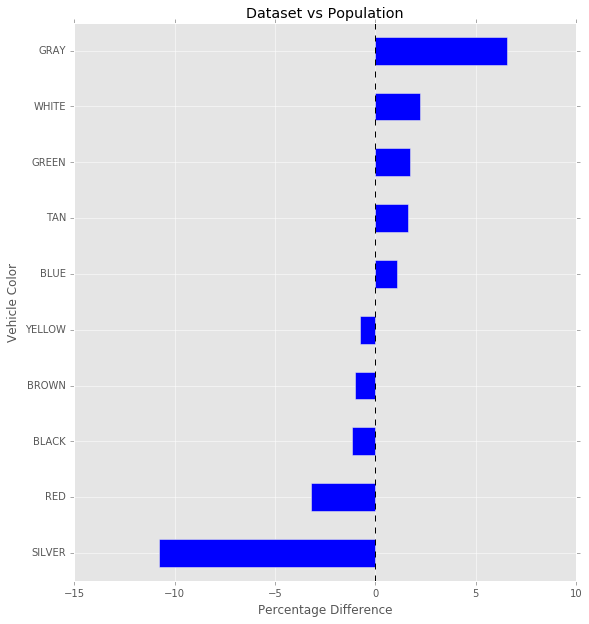

In [12]:
temp2 = pd.Series(byColors)
diff = temp - temp2
diff.order().plot(kind='barh', figsize=[9, 10])
plt.title('Dataset vs Population')
plt.ylabel('Vehicle Color')
plt.xlabel('Percentage Difference')

# By make

In [13]:
# some data cleaning
make = data.index[data['Vehicle Make'] == 'TOYOT']
data.loc[make, 'Vehicle Make'] = 'TOYOTA'

make = data.index[data['Vehicle Make'] == 'CHEVR']
data.loc[make, 'Vehicle Make'] = 'CHEVROLET'

make = data.index[data['Vehicle Make'] == 'NISSA']
data.loc[make, 'Vehicle Make'] = 'NISSAN'

make = data.index[data['Vehicle Make'] == 'ME/BE']
data.loc[make, 'Vehicle Make'] = 'MERCEDES-BENZ'

make = data.index[data['Vehicle Make'] == 'HYUND']
data.loc[make, 'Vehicle Make'] = 'HYUNDAI'

make = data.index[data['Vehicle Make'] == 'VOLKS']
data.loc[make, 'Vehicle Make'] = 'VOLKSWAGEN'

make = data.index[data['Vehicle Make'] == 'CHRYS']
data.loc[make, 'Vehicle Make'] = 'CHRYSLER'

make = data.index[data['Vehicle Make'] == 'LINCO']
data.loc[make, 'Vehicle Make'] = 'LINCOLN'

make = data.index[data['Vehicle Make'] == 'MITSU']
data.loc[make, 'Vehicle Make'] = 'MITSUBISHI'

make = data.index[data['Vehicle Make'] == 'INFIN']
data.loc[make, 'Vehicle Make'] = 'INFINITY'

make = data.index[data['Vehicle Make'] == 'MERCU']
data.loc[make, 'Vehicle Make'] = 'MERCURY'

make = data.index[data['Vehicle Make'] == 'SUBAR']
data.loc[make, 'Vehicle Make'] = 'SUBARU'

make = data.index[data['Vehicle Make'] == 'CADIL']
data.loc[make, 'Vehicle Make'] = 'CADILLAC'

make = data.index[data['Vehicle Make'] == 'FRUEH']
data.loc[make, 'Vehicle Make'] = 'FRUEHAUF'

In [14]:
# total
data.groupby('Vehicle Make').size().order(ascending=False).head(10)

Vehicle Make
FORD             1521874
TOYOTA           1217087
HONDA            1102614
NISSAN            908783
CHEVROLET         897845
FRUEHAUF          432073
DODGE             403307
MERCEDES-BENZ     386609
BMW               377156
GMC               354039
dtype: int64

In [15]:
# percentage
temp = data.groupby('Vehicle Make').size().apply(lambda x: 100*x/float(data.shape[0])).order(ascending=False).head(10)
temp

Vehicle Make
FORD             12.887154
TOYOTA           10.306232
HONDA             9.336881
NISSAN            7.695529
CHEVROLET         7.602907
FRUEHAUF          3.658773
DODGE             3.415184
MERCEDES-BENZ     3.273786
BMW               3.193738
GMC               2.997985
dtype: float64

In [16]:
# numbers from http://www.goodcarbadcar.net/2015/08/july-2015-usa-auto-sales-figures-by-brand-make.html
byMake = {'FORD':14.5, 'TOYOTA':12.3, 'HONDA':7.9, 'CHEVROLET':12.4, 'NISSAN':7.9, 'DODGE':2.9, 'GMC':3.1, 'MERCEDES-BENZ':2.1, 'FRUEHAUF':3.182694, 'BMW':1.9}
makes = ['FORD', 'TOYOTA', 'HONDA', 'CHEVROLET', 'NISSAN', 'DODGE', 'GMC', 'MERCEDES-BENZ', 'FRUEHAUF', 'BMW']
for make in makes:
    print('%s\t%f' % (make, byMake[make]))

FORD	14.500000
TOYOTA	12.300000
HONDA	7.900000
CHEVROLET	12.400000
NISSAN	7.900000
DODGE	2.900000
GMC	3.100000
MERCEDES-BENZ	2.100000
FRUEHAUF	3.182694
BMW	1.900000


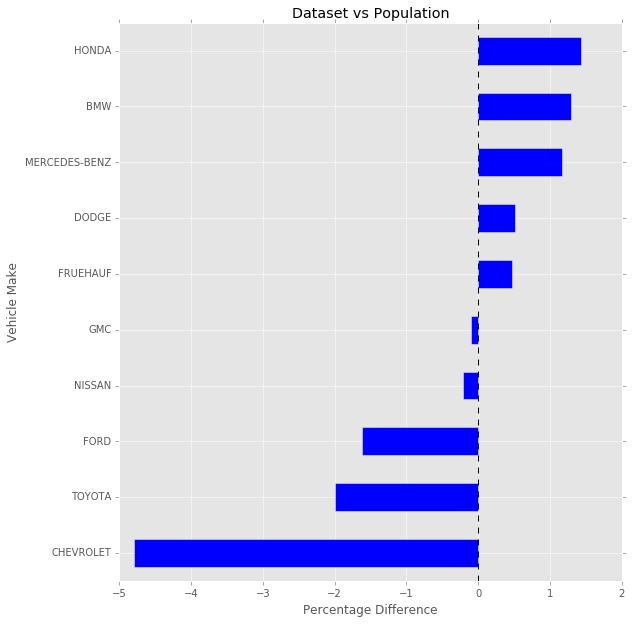

In [17]:
temp2 = pd.Series(byMake)
diff = temp - temp2
diff.order().plot(kind='barh', figsize=[9, 10])
plt.title('Dataset vs Population')
plt.ylabel('Vehicle Make')
plt.xlabel('Percentage Difference')

# By type

In [18]:
# some data cleaning
bodytype = data.index[data['Vehicle Body Type'] == 'SUBN']
data.loc[bodytype, 'Vehicle Body Type'] = 'SUV'
bodytype = data.index[data['Vehicle Body Type'] == 'UTIL']
data.loc[bodytype, 'Vehicle Body Type'] = 'SUV'

bodytype = data.index[data['Vehicle Body Type'] == '4DSD']
data.loc[bodytype, 'Vehicle Body Type'] = 'SEDAN'
bodytype = data.index[data['Vehicle Body Type'] == '2DSD']
data.loc[bodytype, 'Vehicle Body Type'] = 'SEDAN'
bodytype = data.index[data['Vehicle Body Type'] == 'SDN']
data.loc[bodytype, 'Vehicle Body Type'] = 'SEDAN'
bodytype = data.index[data['Vehicle Body Type'] == '4 DR']
data.loc[bodytype, 'Vehicle Body Type'] = 'SEDAN'

bodytype = data.index[data['Vehicle Body Type'] == 'PICK']
data.loc[bodytype, 'Vehicle Body Type'] = 'PICKUP'
bodytype = data.index[data['Vehicle Body Type'] == 'P-U']
data.loc[bodytype, 'Vehicle Body Type'] = 'PICKUP'

bodytype = data.index[data['Vehicle Body Type'] == 'DELV']
data.loc[bodytype, 'Vehicle Body Type'] = 'DELIVERY/TRUCK/TRAILER'
bodytype = data.index[data['Vehicle Body Type'] == 'DELI']
data.loc[bodytype, 'Vehicle Body Type'] = 'DELIVERY/TRUCK/TRAILER'
bodytype = data.index[data['Vehicle Body Type'] == 'REFG']
data.loc[bodytype, 'Vehicle Body Type'] = 'DELIVERY/TRUCK/TRAILER'
bodytype = data.index[data['Vehicle Body Type'] == 'TRAC']
data.loc[bodytype, 'Vehicle Body Type'] = 'DELIVERY/TRUCK/TRAILER'
bodytype = data.index[data['Vehicle Body Type'] == 'TRUC']
data.loc[bodytype, 'Vehicle Body Type'] = 'DELIVERY/TRUCK/TRAILER'
bodytype = data.index[data['Vehicle Body Type'] == 'TRLR']
data.loc[bodytype, 'Vehicle Body Type'] = 'DELIVERY/TRUCK/TRAILER'
bodytype = data.index[data['Vehicle Body Type'] == 'FLAT']
data.loc[bodytype, 'Vehicle Body Type'] = 'DELIVERY/TRUCK/TRAILER'
bodytype = data.index[data['Vehicle Body Type'] == 'TK']
data.loc[bodytype, 'Vehicle Body Type'] = 'DELIVERY/TRUCK/TRAILER'

bodytype = data.index[data['Vehicle Body Type'] == 'CONV']
data.loc[bodytype, 'Vehicle Body Type'] = 'CONVERTIBLE'

bodytype = data.index[data['Vehicle Body Type'] == 'MCY']
data.loc[bodytype, 'Vehicle Body Type'] = 'MOTORCYCLE'

bodytype = data.index[data['Vehicle Body Type'] == 'WAGO']
data.loc[bodytype, 'Vehicle Body Type'] = 'STATION WAGON'

In [23]:
# total
data.groupby('Vehicle Body Type').size().order(ascending=False).head(10)

Vehicle Body Type
SEDAN                     4235926
SUV                       3823554
VAN                       1709091
DELIVERY/TRUCK/TRAILER    1152987
PICKUP                     326323
TAXI                        69826
BUS                         60383
CONVERTIBLE                 53870
MOTORCYCLE                  32026
STATION WAGON               30817
dtype: int64

In [24]:
# percentage
temp = data.groupby('Vehicle Body Type').size().apply(lambda x: 100*x/float(data.shape[0])).order(ascending=False).head(10)
temp

Vehicle Body Type
SEDAN                     35.869612
SUV                       32.377666
VAN                       14.472498
DELIVERY/TRUCK/TRAILER     9.763437
PICKUP                     2.763287
TAXI                       0.591283
BUS                        0.511320
CONVERTIBLE                0.456168
MOTORCYCLE                 0.271195
STATION WAGON              0.260957
dtype: float64

In [25]:
# numbers from http://www.autocareweek.com/wp-content/uploads/2014/07/IHS_SUV_CUV_Share_Chart_071614.pdf
# http://www.nyc.gov/html/tlc/downloads/pdf/2014_taxicab_fact_book.pdf
# http://web.mta.info/nyct/facts/ffbus.htm
# http://www.truckinfo.net/trucking/stats.htm
# http://www.statista.com/statistics/191002/number-of-registered-motorcycles-in-the-us-by-state/
byBodyType = {'SEDAN':35.4, 'SUV':36.5, 'VAN':3.6, 'DELIVERY/TRUCK/TRAILER':0.7, 'PICKUP':13.1, 'TAXI':0.14, 'BUS':0.05, 'CONVERTIBLE':1.0, 'MOTORCYCLE':3.5, 'STATION WAGON': 1.2}
styles = ['SEDAN', 'SUV', 'VAN', 'DELIVERY/TRUCK/TRAILER', 'PICKUP', 'TAXI', 'BUS', 'CONVERTIBLE', 'MOTORCYCLE', 'STATION WAGON']
for style in styles:
    print('%s\t%f' % (style, byBodyType[style]))

SEDAN	35.400000
SUV	36.500000
VAN	3.600000
DELIVERY/TRUCK/TRAILER	0.700000
PICKUP	13.100000
TAXI	0.140000
BUS	0.050000
CONVERTIBLE	1.000000
MOTORCYCLE	3.500000
STATION WAGON	1.200000


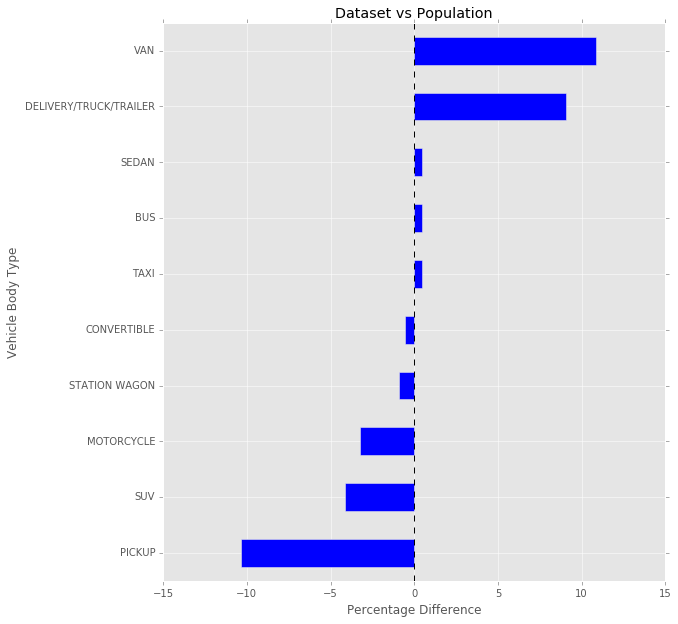

In [26]:
temp2 = pd.Series(byBodyType)
diff = temp - temp2
diff.order().plot(kind='barh', figsize=[9, 10])
plt.title('Dataset vs Population')
plt.ylabel('Vehicle Body Type')
plt.xlabel('Percentage Difference')

# By violation code

In [27]:
# total
data.groupby('Violation Code').size().order(ascending=False).head(10)

Violation Code
21                1630912
38                1418627
14                 988469
36                 839197
37                 795918
7                  719753
20                 662904
46                 595709
71                 576940
40                 534447
dtype: int64

In [28]:
# percentage
temp = data.groupby('Violation Code').size().apply(lambda x: 100*x/float(data.shape[0])).order(ascending=False).head(10)
temp

Violation Code
21                13.810482
38                12.012863
14                 8.370307
36                 7.106279
37                 6.739794
7                  6.094833
20                 5.613438
46                 5.044434
71                 4.885499
40                 4.525671
dtype: float64

Violation codes (from http://www1.nyc.gov/site/finance/vehicles/services-violation-codes.page)

**21** Street Cleaning: No parking where parking is not allowed by sign, street marking or traffic control device

**38** Muni Meter - Failing to show a receipt or tag in the windshield

**14** General No Standing: Standing or parking where standing is not allowed by sign, street marking or; traffic control device

**36** Exceeding the posted speed limit in or near a designated school zone

**37** Muni Meter - Parking in excess of the allowed time

**7** Vehicles photographed going through a red light at an intersection

**20** General No Parking: No parking where parking is not allowed by sign, street marking or traffic control device

**46** Standing or parking on the roadway side of a vehicle stopped, standing or parked at the curb; in other words also known as "double parking"

**71** Standing or parking a vehicle without showing a current inspection sticker

**40** Stopping, standing or parking closer than 15 feet of a fire hydrant

# By time

In [29]:
nan = float('nan')

def formatTime(value):
    try:
        hour = int(value[:2])
        minute = int(value[2:4])
        period = value[4]
        if hour > 12 or minute > 60 or not(period == 'A' or period == 'P'):
            return nan
        if period == 'P' and hour < 12:
            hour += 12
        if period == 'A' and hour == 12:
            hour = 0
        return hour
    except TypeError:
        return nan
    except ValueError:
        return nan
    except IndexError:
        return nan

data['hours'] = data['Violation Time'].apply(formatTime)

In [30]:
data.groupby('hours').size()

hours
0         122846
1         112037
2          95648
3          75314
4          36646
5          96592
6         240341
7         589111
8        1065666
9        1236852
10       1015951
11       1228626
12       1019614
13       1144069
14        982077
15        713689
16        664213
17        479265
18        302341
19         91588
20        147507
21        148110
22        109903
23         89258
dtype: int64

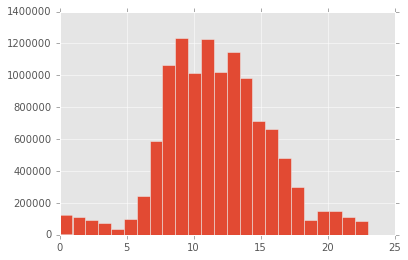

In [31]:
data.hours.hist(bins=24)

# Vehicle Year

In [32]:
def formatYear(value):
    if value < 2015 and value > 1900:
        return value
    else:
        return nan

data['years'] = data['Vehicle Year'].apply(formatYear)

In [33]:
data.groupby('years').size().order(ascending=False)

years
2013     1050893
2014      963649
2012      727712
2007      602511
2011      565597
2006      528679
2008      503688
2005      494730
2010      460283
2004      449506
2009      397132
2003      394699
2002      350095
2001      304603
1999      194843
1998      154099
1997      138512
1996       83141
1995       78806
1994       36202
1990       28263
1988       26194
1993       23911
1992       21388
1989       15778
1987       12227
1991       10622
1986        7878
1985        3588
1984        1887
1983        1160
1980         735
1982         729
1979         656
1981         531
1978         488
1977         450
1975         335
1971         334
1973         319
1972         318
1976         308
1974         281
1970         256
dtype: int64

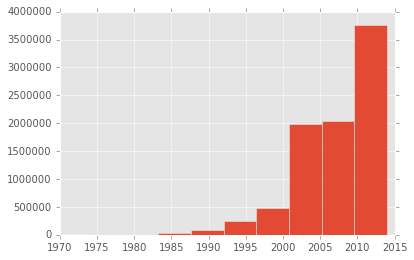

In [34]:
data.years.hist(bins=10)

# Frequent Itemsets

In [35]:
subset = data[['Registration State', 'Vehicle Color', 'Vehicle Make', 'Vehicle Body Type', 'hours', 'years', 'Violation Code']].copy()

def replaceNaN(value):
    if np.isnan(value):
        return '?'
    else:
        return value

def replaceOther(known):
    def replacer(value):
        if not value in known:
            return '.'
        else:
            return value
    return replacer

subset['hours'] = subset['hours'].apply(replaceNaN)
subset['years'] = subset['years'].apply(replaceNaN)

known_states = ['AL','AK','AS','AZ','AR','CA','CO','CT','DE','DC','FL','GA','GU','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MH','MA','MI','FM','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','MP','OH','OK','OR','PW','PA','PR','RI','SC','SD','TN','TX','UT','VT','VA','VI','WA','WV','WI','WY']
subset['Registration State'] = subset['Registration State'].apply(replaceOther(known_states))

known_colors = ['WHITE','GRAY','BLACK','BLUE','SILVER','RED','GREEN','BROWN','YELLOW','TAN','GOLD','ORANGE','PURPLE']
subset['Vehicle Color'] = subset['Vehicle Color'].apply(replaceOther(known_colors))

known_makes = ['TOYOTA','CHEVROLET','NISSAN','MERCEDES-BENZ','HYUNDAI','VOLKSWAGEN','CHRYSLER','LINCOLN','MITSUBISHI','INFINITY','MERCURY','SUBARU','CADILLAC','FRUEHAUF','BMW']
subset['Vehicle Make'] = subset['Vehicle Make'].apply(replaceOther(known_makes))

known_types = ['SUV','SEDAN','PICKUP','DELIVERY/TRUCK/TRAILER','CONVERTIBLE','MOTORCYCLE','STATION WAGON']
subset['Vehicle Body Type'] = subset['Vehicle Body Type'].apply(replaceOther(known_types))

In [36]:
import Orange
from Orange.feature import Discrete, Continuous
from Orange.data import Domain, Table

domain = Domain([
    Discrete('Registration State', values=[str(v) for v in np.unique(subset['Registration State'])]),
    Discrete('Vehicle Color', values=[str(v) for v in np.unique(subset['Vehicle Color'])]),
    Discrete('Vehicle Make', values=[str(v) for v in np.unique(subset['Vehicle Make'])]),
    Discrete('Vehicle Body Type', values=[str(v) for v in np.unique(subset['Vehicle Body Type'])]),
    Discrete('hours', values=[str(v).replace('.0', '') for v in np.unique(subset['hours'])]),
    Discrete('years', values=[str(v).replace('.0', '') for v in np.unique(subset['years'])]),
    Discrete('Violation Code', values=[str(v) for v in np.unique(subset['Violation Code'])])], True)
table = Table(domain, [map(lambda value: str(value).replace('.0', ''), row) for row in subset.as_matrix()])

In [37]:
rules = Orange.associate.AssociationRulesInducer(table, support=0.1, confidence=0.1, max_item_sets=100000000)
print('%8s %8s  %s' % ('Supp', 'Conf', 'Rule'))
for r in rules:
    print('%f %f  %s' % (r.support, r.confidence, r))

    Supp     Conf  Rule
0.148511 0.788273  Vehicle Color=BLACK -> Registration State=NY
0.148511 0.190770  Registration State=NY -> Vehicle Color=BLACK
0.166522 0.850797  Vehicle Color=GRAY -> Registration State=NY
0.166522 0.213906  Registration State=NY -> Vehicle Color=GRAY
0.214526 0.760662  Vehicle Color=WHITE -> Registration State=NY
0.214526 0.275569  Registration State=NY -> Vehicle Color=WHITE
0.398261 0.770436  Vehicle Make=. -> Registration State=NY
0.398261 0.511586  Registration State=NY -> Vehicle Make=.
0.142102 0.779169  Vehicle Body Type=. -> Registration State=NY
0.142102 0.182537  Registration State=NY -> Vehicle Body Type=.
0.279285 0.778613  Vehicle Body Type=SEDAN -> Registration State=NY
0.279285 0.358756  Registration State=NY -> Vehicle Body Type=SEDAN
0.271685 0.839113  Vehicle Body Type=SUV -> Registration State=NY
0.271685 0.348993  Registration State=NY -> Vehicle Body Type=SUV
0.103342 0.748284  Violation Code=21 -> Registration State=NY
0.103342 0.132747 

In [38]:
rules = Orange.associate.AssociationRulesInducer(table, support=0.01, confidence=0.10, classification_rules=True)
print('%8s %8s  %s' % ('Supp', 'Conf', 'Rule'))
for r in rules:
    print('%f %f  %s' % (r.support, r.confidence, r))

    Supp     Conf  Rule
0.013261 0.160424  Registration State=NJ years=? -> Violation Code=14
0.010286 0.124439  Registration State=NJ years=? -> Violation Code=38
0.013316 0.145544  Registration State=NJ -> Violation Code=14
0.010288 0.112448  Registration State=NJ -> Violation Code=38
0.010292 0.159941  Registration State=NY Vehicle Color=BLACK Vehicle Make=. -> Violation Code=21
0.012229 0.168694  Registration State=NY Vehicle Color=BLACK Vehicle Body Type=SEDAN -> Violation Code=21
0.010164 0.154635  Registration State=NY Vehicle Color=BLACK Vehicle Body Type=SUV -> Violation Code=21
0.023477 0.158081  Registration State=NY Vehicle Color=BLACK -> Violation Code=21
0.017740 0.119453  Registration State=NY Vehicle Color=BLACK -> Violation Code=38
0.010418 0.159955  Registration State=NY Vehicle Color=BLUE -> Violation Code=21
0.011827 0.160004  Registration State=NY Vehicle Color=GRAY Vehicle Make=. -> Violation Code=21
0.014253 0.171842  Registration State=NY Vehicle Color=GRAY Vehi

# Plate ID

In [39]:
# total
data.groupby(['Plate ID', 'Registration State']).size().order(ascending=False).head(11)

Plate ID    Registration State
BLANKPLATE  99                    14786
44491JW     NY                     1721
92979JE     NY                     1387
2208638     IN                     1368
42860JM     NY                     1329
49839JG     NY                     1256
AN917T      NJ                     1240
49781MA     NY                     1169
47603MD     NY                     1158
2028685     IN                     1076
AM471N      NJ                     1045
dtype: int64

In [40]:
data[(data['Plate ID'] == '44491JW') & (data['Registration State'] == 'NY')]

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation,hours,years
3197,1371505469,44491JW,NY,COM,2014-07-03,45,DELIVERY/TRUCK/TRAILER,INTER,P,29830,...,2005,-,0,NaN,NaN,NaN,NaN,NaN,9,2005
36286,1368349134,44491JW,NY,COM,2015-05-26,40,DELIVERY/TRUCK/TRAILER,INTER,X,29830,...,2005,-,0,NaN,NaN,NaN,NaN,NaN,14,2005
46053,1380481806,44491JW,NY,COM,2015-02-08,46,DELIVERY/TRUCK/TRAILER,MERCURY,P,29830,...,2005,-,0,NaN,NaN,NaN,NaN,NaN,10,2005
61880,1374332896,44491JW,NY,COM,2014-09-23,14,DELIVERY/TRUCK/TRAILER,INTER,X,29830,...,2008,-,0,NaN,NaN,NaN,NaN,NaN,10,2008
63285,1374324322,44491JW,NY,COM,2014-10-16,46,DELIVERY/TRUCK/TRAILER,MERCURY,X,29830,...,2005,-,0,NaN,NaN,NaN,NaN,NaN,19,2005
65609,1374335071,44491JW,NY,COM,2014-09-17,46,DELIVERY/TRUCK/TRAILER,MERCURY,P,29830,...,2005,-,0,NaN,NaN,NaN,NaN,NaN,10,2005
69270,1364430060,44491JW,NY,PAS,2014-10-20,14,DELIVERY/TRUCK/TRAILER,NaN,P,29830,...,0,-,0,NaN,NaN,NaN,NaN,NaN,13,NaN
72988,1374340224,44491JW,NY,999,2014-10-17,14,DELIVERY/TRUCK/TRAILER,INTER,P,29830,...,2005,-,0,NaN,NaN,NaN,NaN,NaN,10,2005
84281,1372023331,44491JW,NY,COM,2014-08-12,46,DELIVERY/TRUCK/TRAILER,MERCURY,P,29830,...,2005,-,0,NaN,NaN,NaN,NaN,NaN,10,2005
85422,1374326847,44491JW,NY,COM,2014-08-28,46,DELIVERY/TRUCK/TRAILER,MERCURY,P,29830,...,2005,-,0,NaN,NaN,NaN,NaN,NaN,9,2005


In [41]:
# total passenger
data[(data['Plate Type'] == 'PAS') & (data['Vehicle Body Type'] != 'DELIVERY/TRUCK/TRAILER') & (data['Vehicle Body Type'] != 'VAN') & (data['Vehicle Body Type'] != 'SUV')].groupby(['Plate ID', 'Registration State']).size().order(ascending=False).head(10)

Plate ID  Registration State
N/S       NY                    363
XT308U    NJ                    308
GKJ5051   NY                    281
OYA9222   NJ                    268
FZL7855   NY                    258
OXZ6878   NJ                    229
OXZ4781   NJ                    214
OYA9876   NJ                    212
OYA9878   NJ                    205
X20DCM    NJ                    200
dtype: int64

In [42]:
data[(data['Plate ID'] == 'XT308U')]

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation,hours,years
2207145,7926548832,XT308U,NJ,PAS,2015-01-14,14,SEDAN,PONTI,T,18230,...,0,NaN,0,A 77,14-No Standing,NaN,NaN,NaN,14,NaN
2207146,7926548832,XT308U,NJ,PAS,2015-01-14,14,SEDAN,PONTI,T,18230,...,0,NaN,0,A 77,14-No Standing,NaN,NaN,NaN,14,NaN
2250803,7037491720,XT308U,NJ,PAS,2014-11-03,69,VAN,PONTI,T,18110,...,0,NaN,0,CC1,69-Failure to Disp Muni Recpt,NaN,NaN,NaN,16,NaN
2284651,7661829162,XT308U,NJ,PAS,2014-09-18,14,SEDAN,PONTI,T,18150,...,0,NaN,0,17 7,14-No Standing,NaN,NaN,NaN,12,NaN
2305304,7980216519,XT308U,NJ,PAS,2014-08-04,14,SEDAN,NS/OT,T,18210,...,0,NaN,0,08 7,14-No Standing,NaN,NaN,NaN,13,NaN
2366062,7059808905,XT308U,NJ,PAS,2014-08-06,14,SEDAN,PONTI,T,27790,...,0,NaN,0,16 6,14-No Standing,NaN,NaN,NaN,17,NaN
2414502,7984782891,XT308U,NJ,PAS,2015-04-24,14,SEDAN,PONTI,T,27790,...,0,NaN,0,CC1,14-No Standing,NaN,NaN,NaN,16,NaN
2421360,7575990770,XT308U,NJ,PAS,2015-04-29,17,SEDAN,PONTI,T,18170,...,0,NaN,0,CC1,17-No Stand (exc auth veh),NaN,NaN,NaN,13,NaN
2424070,7577981953,XT308U,NJ,PAS,2015-03-17,14,SEDAN,PONTI,T,27790,...,0,NaN,0,F 77,14-No Standing,NaN,NaN,NaN,16,NaN
2467310,8029963026,XT308U,NJ,PAS,2015-03-31,14,SEDAN,NS/OT,T,27790,...,0,NaN,0,16 6,14-No Standing,NaN,NaN,NaN,17,NaN


In [43]:
data[(data['Plate ID'] == 'XT308U')].groupby('Violation Code').size().order(ascending=False)

Violation Code
14                243
69                106
16                 12
38                 11
40                  8
17                  5
13                  5
42                  4
31                  3
46                  2
82                  1
37                  1
dtype: int64

# UPS

In [44]:
data[(data['Vehicle Color'] == 'BROWN') & ((data['Vehicle Body Type'] == 'DELIVERY/TRUCK/TRAILER') | (data['Vehicle Body Type'] == 'VAN')) & (data['Plate Type'] == 'COM')].shape

(358368, 45)

# By Borough

In [45]:
# some data cleaning
county = data.index[data['Violation County'] == 'NY']
data.loc[county, 'Violation County'] = 'MANHATTAN'
county = data.index[data['Violation County'] == 'NYC']
data.loc[county, 'Violation County'] = 'MANHATTAN'
county = data.index[data['Violation County'] == 'K']
data.loc[county, 'Violation County'] = 'BROOKLYN'
county = data.index[data['Violation County'] == 'KINGS']
data.loc[county, 'Violation County'] = 'BROOKLYN'
county = data.index[data['Violation County'] == 'Q']
data.loc[county, 'Violation County'] = 'QUEENS'
county = data.index[data['Violation County'] == 'QUEEN']
data.loc[county, 'Violation County'] = 'QUEENS'
county = data.index[data['Violation County'] == '103']
data.loc[county, 'Violation County'] = 'QUEENS'
county = data.index[data['Violation County'] == 'BX']
data.loc[county, 'Violation County'] = 'BRONX'
county = data.index[data['Violation County'] == 'R']
data.loc[county, 'Violation County'] = 'STATEN ISLAND'
county = data.index[data['Violation County'] == 'RICH']
data.loc[county, 'Violation County'] = 'STATEN ISLAND'
county = data.index[data['Violation County'] == 'RC']
data.loc[county, 'Violation County'] = 'STATEN ISLAND'
county = data.index[data['Violation County'] == 'MAN']
data.loc[county, 'Violation County'] = 'MANHATTAN'
county = data.index[data['Violation County'] == 'NEWY']
data.loc[county, 'Violation County'] = 'MANHATTAN'
county = data.index[data['Violation County'] == 'NEW Y']
data.loc[county, 'Violation County'] = 'MANHATTAN'
county = data.index[data['Violation County'] == 'MH']
data.loc[county, 'Violation County'] = 'MANHATTAN'
county = data.index[data['Violation County'] == 'QU']
data.loc[county, 'Violation County'] = 'QUEENS'
county = data.index[data['Violation County'] == 'KING']
data.loc[county, 'Violation County'] = 'BROOKLYN'

In [48]:
# total
data.groupby('Violation County').size().order(ascending=False)

Violation County
MANHATTAN           4110597
BROOKLYN            2395633
QUEENS              2165269
BRONX               1183683
STATEN ISLAND        114317
dtype: int64

In [49]:
# percentage
temp = data.groupby('Violation County').size().apply(lambda x: 100*x/float(data.shape[0])).order(ascending=False).head(10)
temp

Violation County
MANHATTAN           34.808332
BROOKLYN            20.286102
QUEENS              18.335391
BRONX               10.023369
STATEN ISLAND        0.968031
dtype: float64

In [50]:
# numbers from https://en.wikipedia.org/wiki/Borough_(New_York_City)
byCounties = {'MANHATTAN':163626800.0/8491079,'BRONX':143815900.0/8491079,'BROOKLYN':262179300.0/8491079,'QUEENS':232158000.0/8491079,'STATEN ISLAND':47327900.0/8491079}
counties = ['MANHATTAN','BROOKLYN','QUEENS','BRONX','STATEN ISLAND']
for county in counties:
    print('%s\t%f' % (county, byCounties[county]))

MANHATTAN	19.270437
BROOKLYN	30.877030
QUEENS	27.341401
BRONX	16.937294
STATEN ISLAND	5.573838


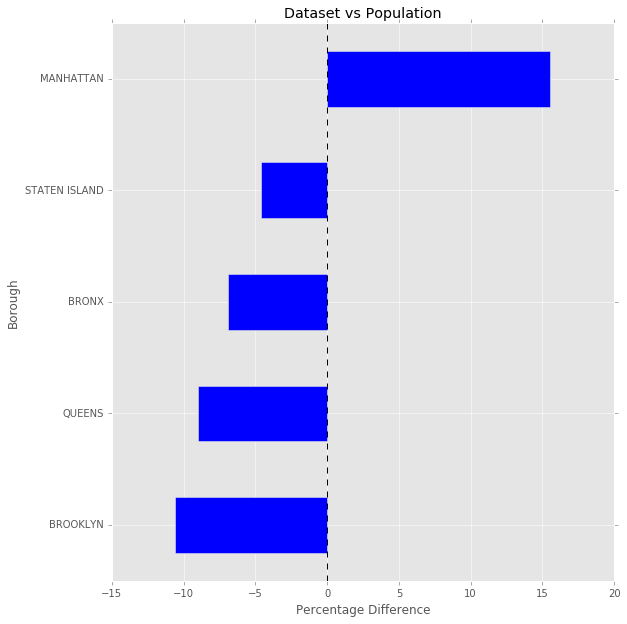

In [51]:
temp2 = pd.Series(byCounties)
diff = temp - temp2
diff.order().plot(kind='barh', figsize=[9, 10])
plt.title('Dataset vs Population')
plt.ylabel('Borough')
plt.xlabel('Percentage Difference')

# By Issuer

In [52]:
data.groupby('Issuer Code').size().order(ascending=False).head(11)

Issuer Code
0              1791435
355542           20160
352979           15975
346199           15084
347615           15014
346124           13936
351966           13664
355598           13119
354084           13045
355156           12921
347607           12591
dtype: int64

In [65]:
data[data['Issuer Code'] == 347607].groupby('Violation Precinct').size()

Violation Precinct
73                     796
75                    1801
77                    3087
78                       1
79                    1640
81                    1227
83                     861
84                     180
88                     415
90                    1247
94                    1336
dtype: int64

In [ ]:
# where top 10 issuers work:
#2 brooklyn
#3 brooklyn
#4 brooklyn
#5 brooklyn
#6 brooklyn
#7 brooklyn
#8 bronx
#9 manhattan
#10 manhattan
#11 brooklyn

# Day of week

In [66]:
data['day_of_week'] = data['Issue Date'].apply(lambda x: x.date().weekday())

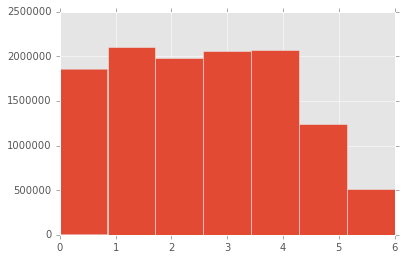

In [67]:
data.day_of_week.hist(bins=7)

In [68]:
ts = data.set_index(['Issue Date'])
data_2014_2015 = ts.ix['2014-07-01':'2015-06-30']
days = data_2014_2015.groupby(data_2014_2015.index).size()
days.to_csv('days_2015.csv')

In [73]:
from ggplot import *
days = pd.read_csv('days_2015.csv', parse_dates=['date'])

/usr/lib64/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


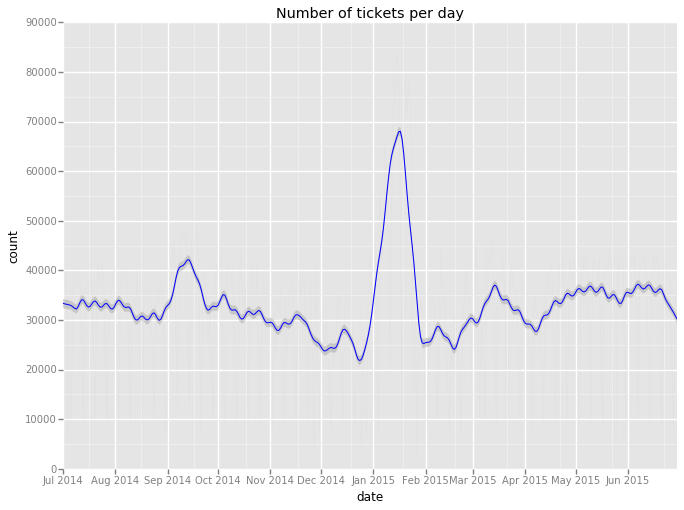

<ggplot: (8740378249149)>

In [74]:
ggplot(aes(x='date', y='count'), data=days) + geom_line(alpha=0.01) + stat_smooth(span=0.05, colour='blue') + ggtitle('Number of tickets per day')

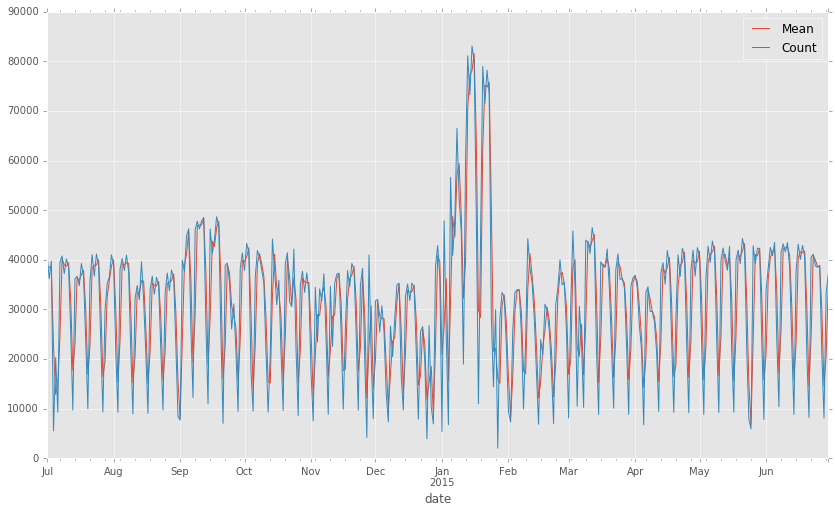

In [75]:
days = days.set_index(['date'])
mean = pd.rolling_mean(days['count'], 2)
plt.figure(figsize=(14,8))
mean.plot(label='Mean')
days['count'].plot(label='Count')
plt.legend()
plt.show()

# Top violations per body type

In [80]:
data[data['Vehicle Body Type'] == 'BUS'].groupby('Violation Code').size().order(ascending=False).head(10)

Violation Code
77                15098
14                 8756
1                  5230
3                  4392
7                  4278
36                 3558
19                 3361
79                 1917
38                 1667
20                 1535
dtype: int64

In [81]:
data[data['Vehicle Body Type'] == 'TAXI'].groupby('Violation Code').size().order(ascending=False).head(10)

Violation Code
7                 15208
13                 8759
21                 5645
14                 4930
36                 4890
5                  4206
38                 4101
20                 3405
46                 2796
40                 2391
dtype: int64